In [11]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
# задаем размер графика
from pylab import rcParams
# импортируем функцию, описывающую тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller

COLOR = {
    1: '#06050D',
    2: '#161233',
    3: '#261E5A',
    4: '#362A81',
    5: '#4636A8'
}


# Подготовка

In [4]:
dirname = os.path.abspath(os.curdir) + r'\data'
lake_ds = pd.read_csv(path.join(os.sep, dirname, 'dataset.csv')) # Читаем .csv файл, в которо содержаьтся данные с годовым количеством осадков в озере Верхнее с 1900 по 1986 год
lake_ds.set_index('Year').sort_index()

,x
Year,
1,28.55
2,27.37
3,25.60
4,29.93
5,27.61
...,...
83,35.82
84,32.27
85,29.09


In [5]:
ds = lake_ds['Year'] + 1899 # Добавим год, чтобы отображать данны
lake_ds['Year'] = ds
lake_ds

,Year,x
0,1900,28.55
1,1901,27.37
2,1902,25.60
3,1903,29.93
4,1904,27.61
...,...,...
82,1982,35.82
83,1983,32.27
84,1984,29.09
85,1985,38.25


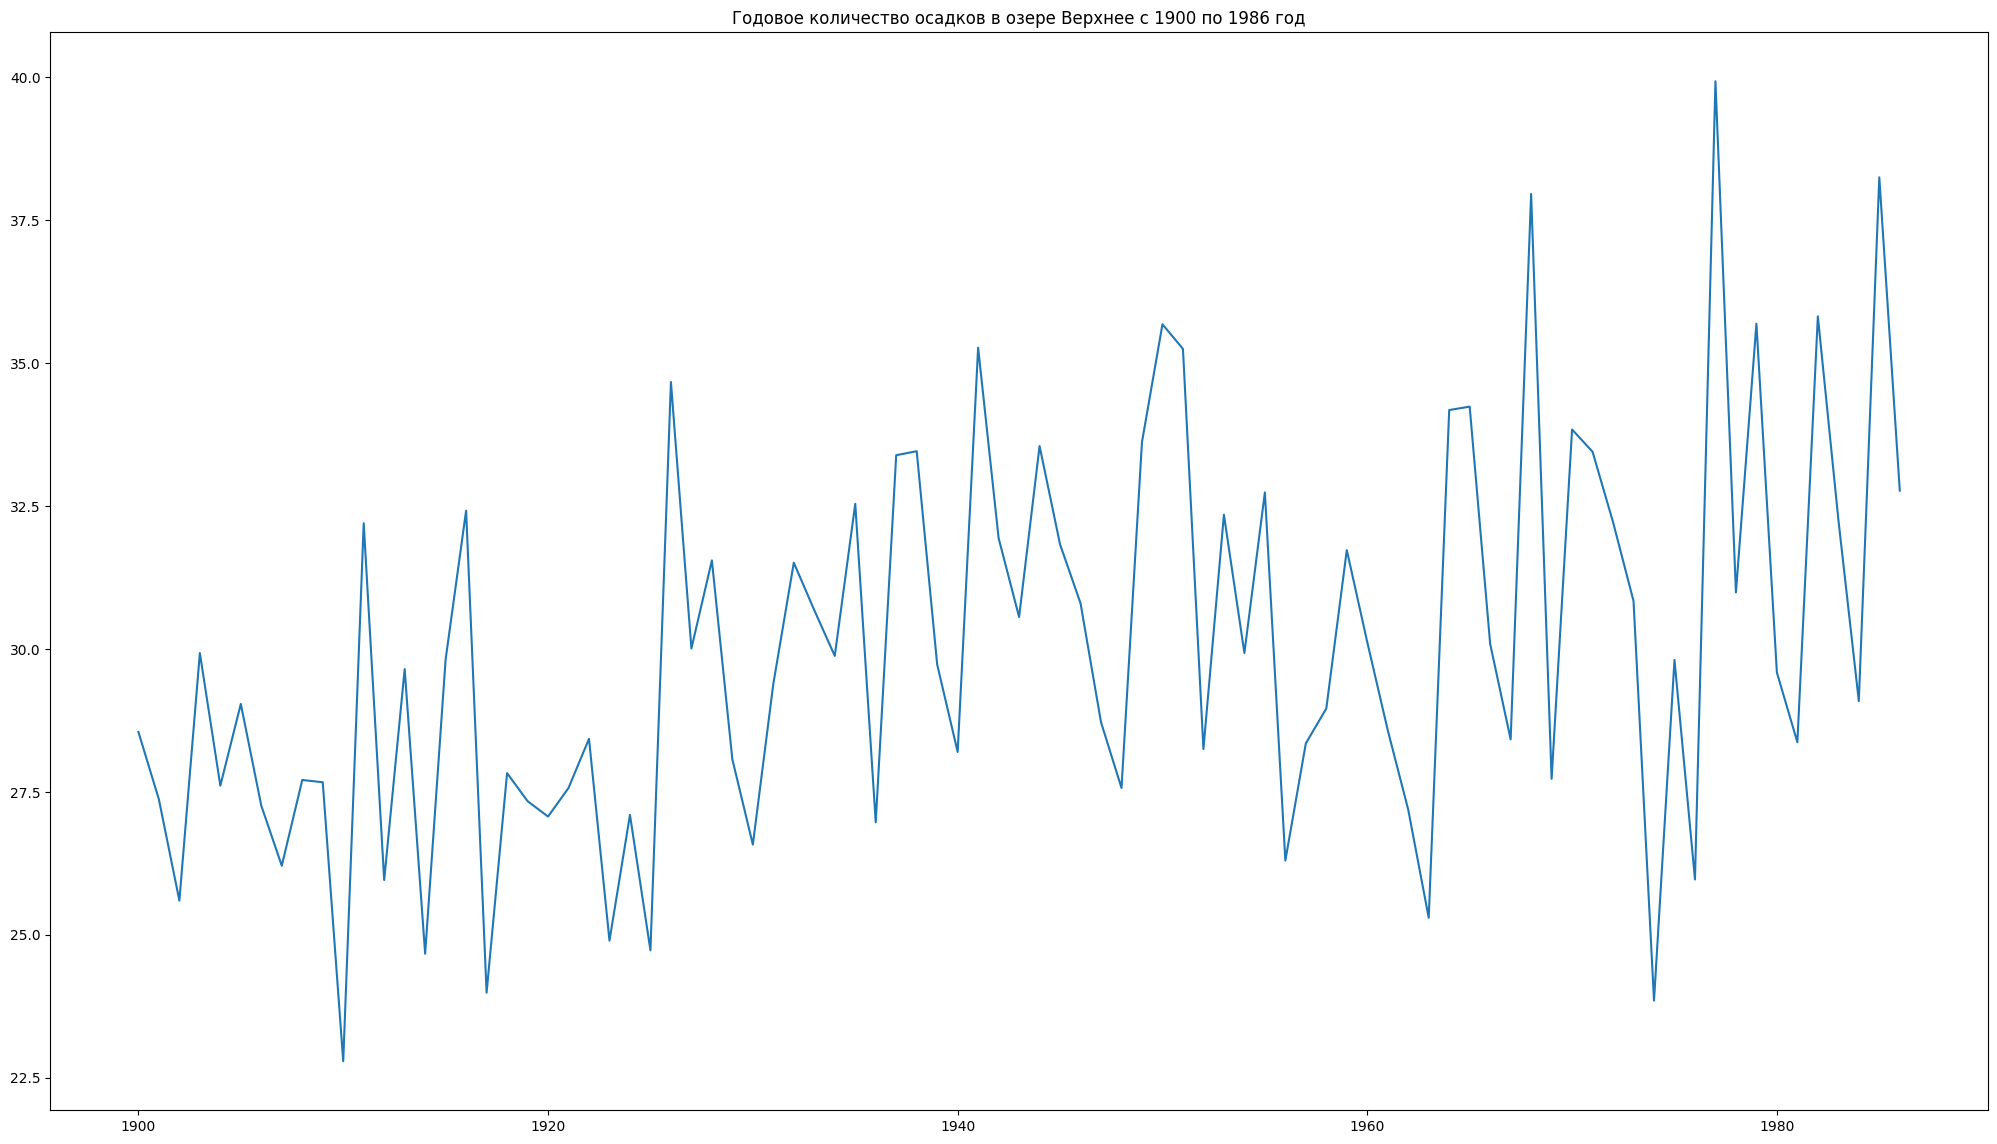

In [6]:
fig, axs = plt.subplots(1,1,figsize=(25, 14))
plt.title("Годовое количество осадков в озере Верхнее с 1900 по 1986 год")
plt.plot(lake_ds['Year'],lake_ds['x'])

# Разложение ряда на компоненты
### Тренды, Сезонность, Остаточность
https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

1) ***Тренд*** — общая долгосрочная тенденция изменения временного ряда, лежащая в основе его динамики.

2) ***Сезонная вариация*** — краткосрочное регулярно повторяющееся колебание значений временного ряда вокруг тренда.

3) ***Циклические колебания*** характеризуют так называемый цикл деловой активности, или экономический цикл, состоящий из экономического подъема, спада, депрессии и оживления. Этот цикл повторяется регулярно.

4) ***Остаточная вариация***, которая может быть двух видов:
**аномальная вариация** — неестественно большое отклонение временного ряда, которое оказывает воздействие на единичное наблюдение;
**случайная вариация** — малое отклонение, которое невозможно предвидеть. В долгосрочной перспективе случайные вариации могут с равной вероятностью как снизить, так и увеличить объем продаж.

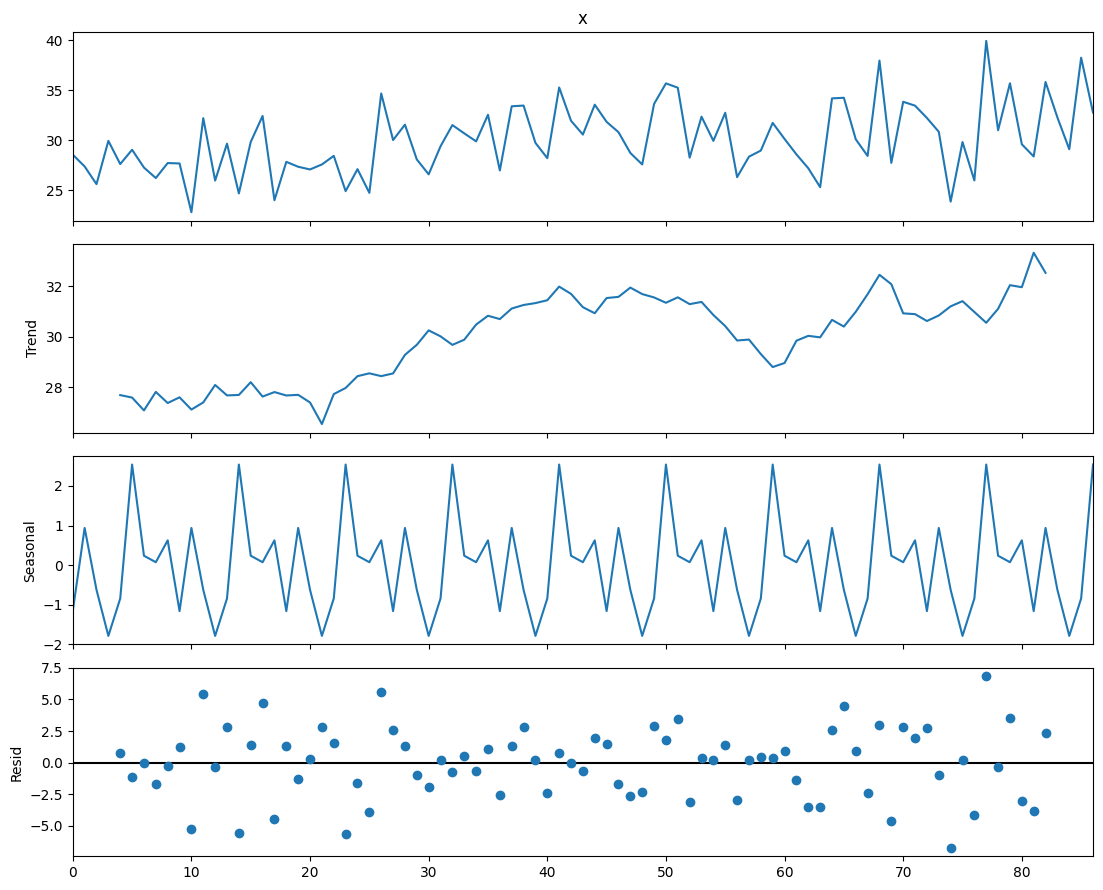

In [7]:
rcParams['figure.figsize'] = 11, 9
decompose = seasonal_decompose(lake_ds['x'], period=9)
decompose.plot()
plt.show()

<Axes: >

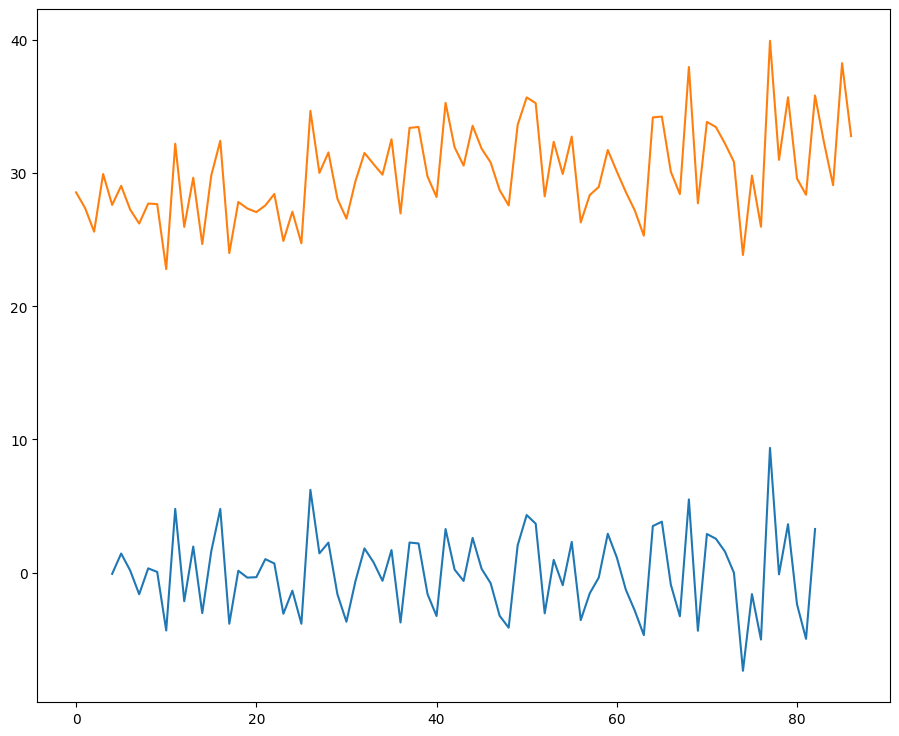

In [8]:
# удаляем компонент тренда из временного ряда
lake_ds_no_trend = lake_ds['x'] - decompose.trend
# отрисовываем обработанный и исходный ряды
lake_ds_no_trend.plot()
lake_ds['x'].plot()


# Проверка ряда на стационарность

Стационарный процесс - это случайный процесс, безусловное совместное распределение вероятностей которого не изменяется при сдвиге во времени. Следовательно, такие параметры, как среднее значение и дисперсия, также не меняются со временем, поэтому стационарные временные ряды легче прогнозировать.

Есть несколько способов установить, является ли временной ряд стационарным или нет, наиболее распространенными являются старая добрая визуализация, просмотр автокорреляции и выполнение статистических тестов.

Наиболее распространенным тестом является тест Дики-Фуллера (также называемый тест ADF), где нулевая гипотеза состоит в том, что временной ряд имеет единичный корень, другими словами, временной ряд не является стационарным.

Мы проверим, можно ли отвергнуть нулевую гипотезу, сравнив значение p с выбранным порогом (α), чтобы, если значение p меньше, мы могли отклонить нулевую гипотезу и предположить, что временной ряд с уверенностью является стационарным. уровень 1-α (технически мы просто не можем сказать, что это не так)

Временной ряд имеет единичный корень, или порядок интеграции один, если его первые разности образуют стационарный ряд. Это условие записывается как
$y_t\thicksim I(1)$ если ряд первых разностей $\triangle y_t=y_t-y_{t-1}$ является стационарным $\triangle y_t\thicksim I(0)$.

При помощи этого теста проверяют значение коэффициента $a$ в  авторегрессионном уравнении первого порядка AR(1)
$y_t=a\cdot y_{t-1}+\varepsilon_t,$
где $y_t$ — временной ряд, а $\varepsilon$— ошибка.

Если $a=1$, то процесс имеет единичный корень, в этом случае ряд $y_t$ не стационарен, является интегрированным временным рядом первого порядка $I(1)$. Если $|a|<1$, то ряд стационарный $I(0)$.

In [9]:
ALPHA = 0.01
NAME  = 'Кол-во осадков'
ts = lake_ds['x']

print(f'Тест Дики-Фуллера ряда {NAME} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < ALPHA:
    print(f"Значение p меньше {ALPHA * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {ALPHA * 100}%. Ряд не стационарный.")


Тест Дики-Фуллера ряда Кол-во осадков :
Test Statistic                -8.279505e+00
p-value                        4.559966e-13
#Lags Used                     0.000000e+00
Number of Observations Used    8.600000e+01
Critical Value (1%)           -3.508783e+00
Critical Value (5%)           -2.895784e+00
Critical Value (10%)          -2.585038e+00
dtype: float64
Значение p меньше 1.0%. Ряд стационарный.


##### Вывод - ряд стационарный

# Аддитивный и мультипликативный ряды

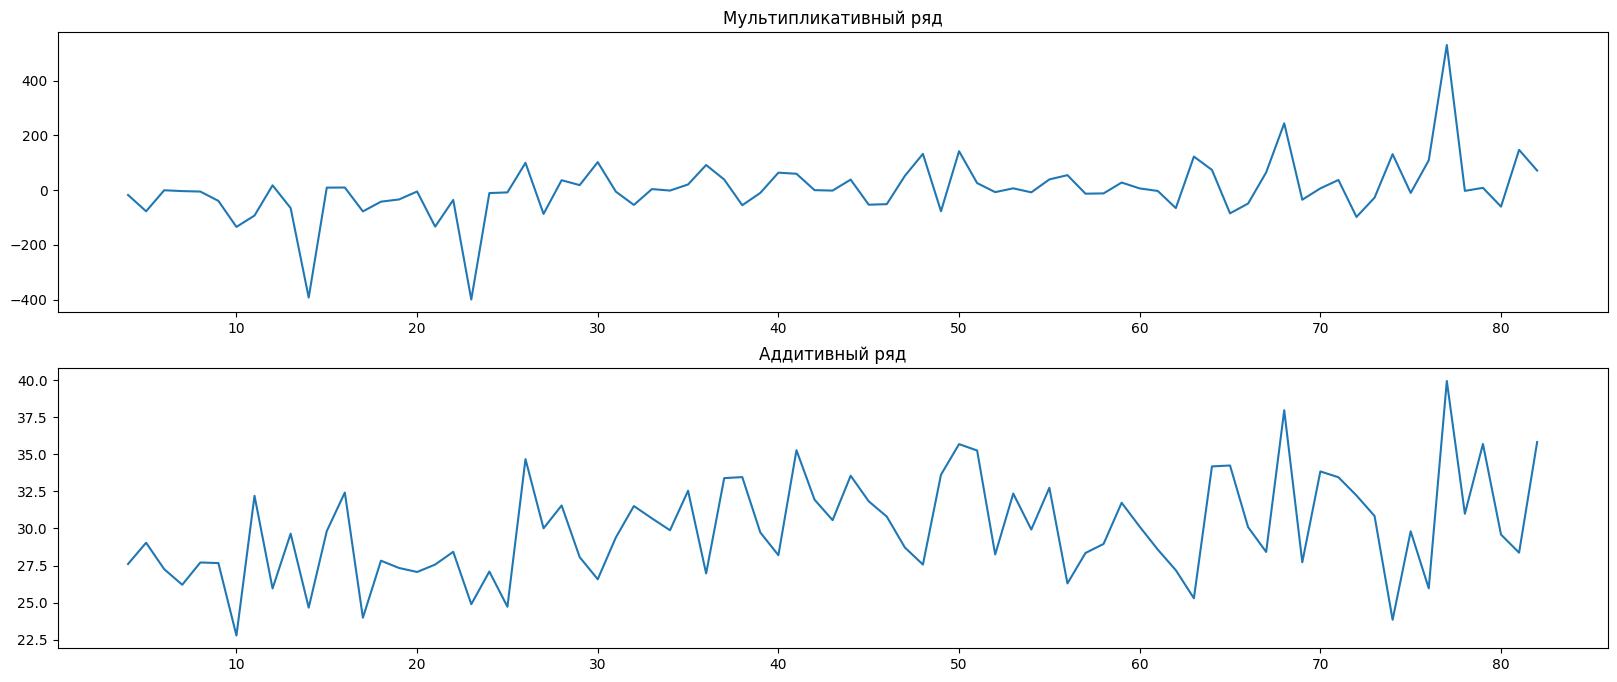

In [10]:
mult_ts = decompose.trend * (decompose.seasonal) * decompose.resid
add_ts = decompose.trend + (decompose.seasonal) + decompose.resid

fig = plt.figure(figsize=(20, 8))
layout = (2, 1)

mult_ax = plt.subplot2grid(layout, (0, 0))
mult_ax.set_title('Мультипликативный ряд')
mult_ax.plot(mult_ts)

add_ax = plt.subplot2grid(layout, (1, 0))
add_ax.set_title('Аддитивный ряд')
add_ax.plot(add_ts)



plt.show()

# Автокорреляция и коррелограмма

Частичная автокорреляция (Partial Autocorrelation) — это краткая характеристика взаимосвязи между наблюдением во временном ряду и наблюдениями на предыдущем отрезке времени, когда влияние малой задержки устранено. Автокорреляция состоит как из прямой, так и из косвенной корреляции.

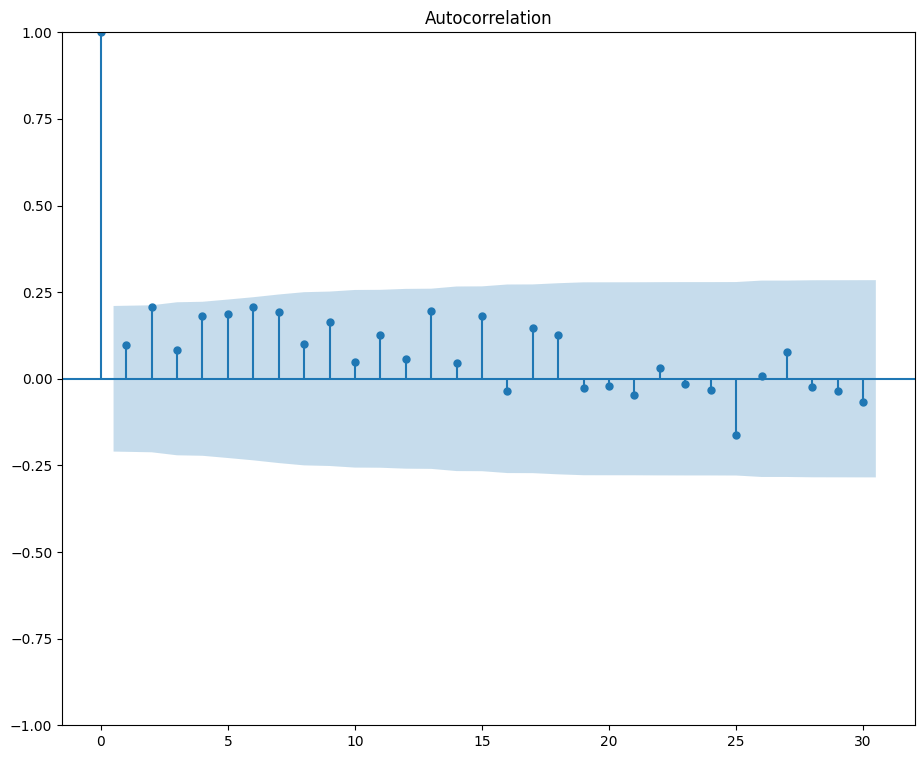

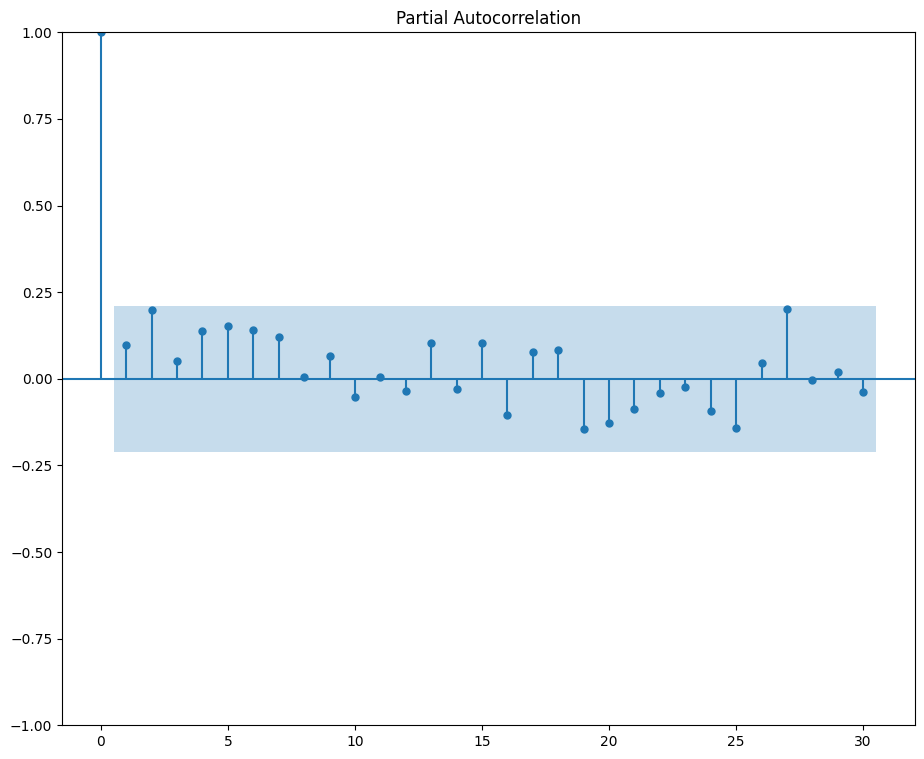

In [17]:
ts = lake_ds["x"]
# изображение отрисовывается с запаздываниями по горизонтали и корреляциями по
# вертикали
ac_plot = smt.graphics.plot_acf(ts, lags=30)
# есть также функция отрисовки частичной автокорреляции
pac_plot = smt.graphics.plot_pacf(ts, lags=30)